In [50]:
#Importing Libraries
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)

In [14]:
f = open("speed.txt", "r")
print(f.read())


542,5729752
547,4710464
546,0941792
545,4246998
546,4000702
543,9832211
550,134182
544,3160534
544,0752506
545,1452732
551,7144203
552,3295403
550,9982109
543,5004234
545,5238819
563,6985302
546,0779667
550,1732826
532,1063995
546,4529991
544,7609425
547,6768017
620,4624176
566,1597252
550,3139496
532,2933197
540,004015
532,6547623
539,7386551
531,0196877
530,680418
531,075716
531,9199562
531,7728519
534,7771645
545,5610752
539,0815735
535,5875492
533,9889526
535,8672142
535,7892513
531,9976807
532,6464176
531,6903591
529,5722485
538,3439064
529,5596123
530,34091
540,191412
529,9310684
535,2647305
539,7539139
533,7758064
529,0956497
530,3738117
529,0522575
536,4017487
529,8843384
531,5918922
530,3280354
531,4998627
571,9559193
532,6640606
532,3700905
529,8883915
532,4473381
533,0080986
540,8957005
529,2313099
533,1652164
535,1624489
533,2567692
536,0138416
539,9837494
531,015873
531,2690735
530,2159786
529,6223164
537,7070904
531,1107635
531,1505795
528,8157463
531,8629742
528,6865234


In [72]:
#Single or multiple server queue simulation
l = 1000 # average number of arrivals per minute
µ =0.00000005289579838 # average number of people served per minute
ncust =10000# number of customers
c=1 # number of servers
#empty dictionary for computing the utilization with each configuration of servers
utilization={}

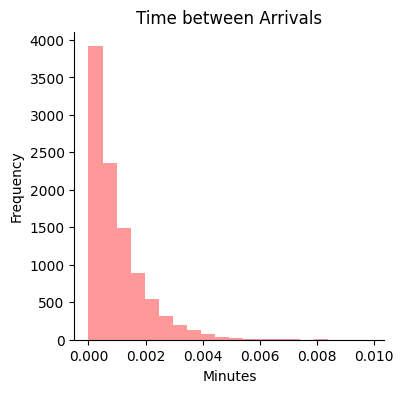

TypeError: float() argument must be a string or a real number, not '_io.TextIOWrapper'

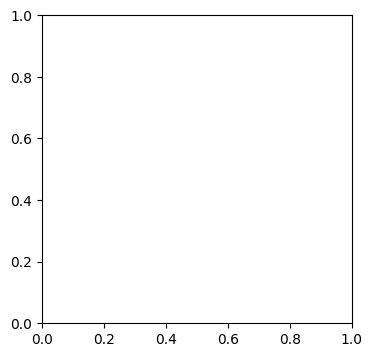

In [87]:
  #generating inter arrival times using exponential distribution
inter_arrival_times = list(np.random.exponential(scale=1/l,size=ncust))

    #plotting data
plt.figure(figsize=(4,4))
sns.distplot(inter_arrival_times,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

 # Generate random service times for each customer 
service_times = list(np.random.exponential(scale=1/µ,size=ncust))  

#service time distribution plot
plt.figure(figsize=(4,4))
sns.distplot(f,kde=False,bins=20)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [75]:
arrival_times= []# list of arrival times of a person joining the queue
#service_times = [] # list of service times once they reach the front
finish_times = [] # list of finish times after waiting and being served
      
arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]
    
arrival_times[0]=round(inter_arrival_times[0],4)#arrival of first customer
#Generate arrival times
for i in range(1,ncust):
    arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)
    

In [76]:
#Generating finish times
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i]=round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)    
    
 # Total time spent in the system by each customer
total_times =[abs(round((finish_times[i]-arrival_times[i]),4)) for i in range(ncust)]
    
    # Time spent@waiting before being served (time spent in the queue)
wait_times = [abs(round((total_times[i] - service_times[i]),4)) for i in range(ncust)]
    

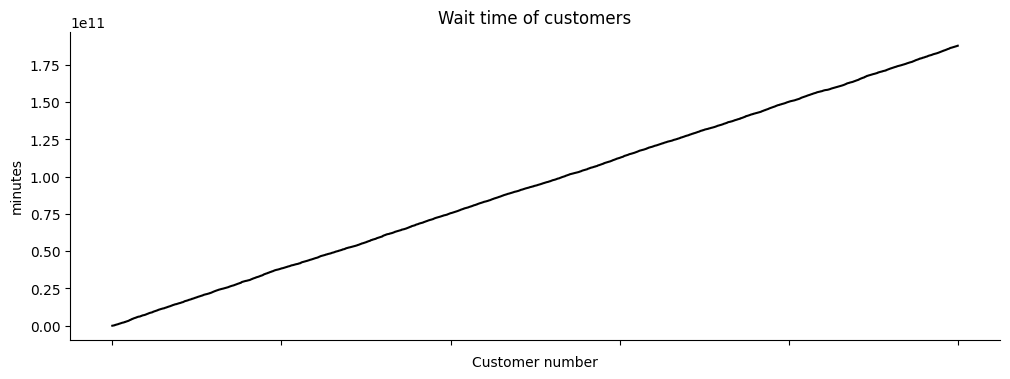

In [77]:
#plotting Wait times

plt.figure(figsize=(12,4))
sns.lineplot(x=data.index,y=wait_times,color='black').set(xticklabels=[])
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers')
sns.despine()
plt.show()

In [78]:
 #creating a dataframe with all the data of the model
    
data = pd.DataFrame(list(zip(arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times)), 
                columns =['arrival_times','finish_times', 'service_times','total_times','wait_times','inter_arrival_times']) 

#Printing the first 5 rows of the data
data.head()

,arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times
0,0.0014,8.712520e+06,8.712520e+06,8.712520e+06,0.000000e+00,0.001419
1,0.0021,1.320063e+07,4.488111e+06,1.320063e+07,8.712520e+06,0.000700
2,0.0023,2.545098e+07,1.225034e+07,2.545098e+07,1.320063e+07,0.000195
3,0.0041,2.707328e+07,1.622307e+06,2.707328e+07,2.545098e+07,0.001787
4,0.0048,3.220340e+07,5.130120e+06,3.220340e+07,2.707328e+07,0.000727


In [79]:
tbe=list([0])
timeline=['simulation starts']
for i in range(0,ncust):
    tbe.append(data['arrival_times'][i])
    tbe.append(data['finish_times'][i])
    timeline.append('customer ' +str(i+1)+' arrived')
    timeline.append('customer ' +str(i+1)+' left')
        
    
#generating a dataframe with the timeline and description of events
    
timeline = pd.DataFrame(list(zip(tbe,timeline)), 
                columns =['time','Timeline']).sort_values(by='time').reset_index()
timeline=timeline.drop(columns='index')

#printing the first 5 rows of the data
timeline.head()

,time,Timeline
0,0.0000,simulation starts
1,0.0014,customer 1 arrived
2,0.0021,customer 2 arrived
3,0.0023,customer 3 arrived
4,0.0041,customer 4 arrived


In [80]:
#generating the number of customers inside the system at any given time of the simulation
    
timeline['n']=0
x=0
for i in range(1,(2*ncust)-1):
    if len(((timeline.Timeline[i]).split()))>2:
        z=str(timeline['Timeline'][i]).split()[2]
    else:
        continue
    if z =='arrived':
        x = x+1
        timeline['n'][i]=x
    else:
        x=x-1
        if x==-1:
            x=0
        timeline['n'][i]=x

In [81]:
  #computing time between events
t= list()
for i in timeline.index:
    if i == (2*ncust) -2 :
        continue
    if i < 2*ncust:
        x=timeline.time[i+1]
    else:
        x=timeline.time[i]
    y=timeline.time[i]
    t.append(round((x-y),4))

t.append(0) 
timeline['tbe']=t

In [82]:
#show results
timeline.head()

,time,Timeline,n,tbe
0,0.0000,simulation starts,0,0.0014
1,0.0014,customer 1 arrived,1,0.0007
2,0.0021,customer 2 arrived,2,0.0002
3,0.0023,customer 3 arrived,3,0.0018
4,0.0041,customer 4 arrived,4,0.0007


In [83]:
  #computing the probability and time spent of 'n' customers in the system
    
Pn=timeline.groupby('n').tbe.agg(sum)/sum(t)
Tn=timeline.groupby('n').tbe.agg('count')
timeline.groupby('n').tbe.agg(sum)/sum(t)

n
0        7.449726e-15
1        3.724863e-15
2        8.062364e-05
3        2.677414e-05
4        1.188992e-04
             ...     
9996     2.729856e-05
9997     8.632672e-06
9998     6.518693e-05
9999     2.388228e-05
10000    4.636129e-05
Name: tbe, Length: 10001, dtype: float64

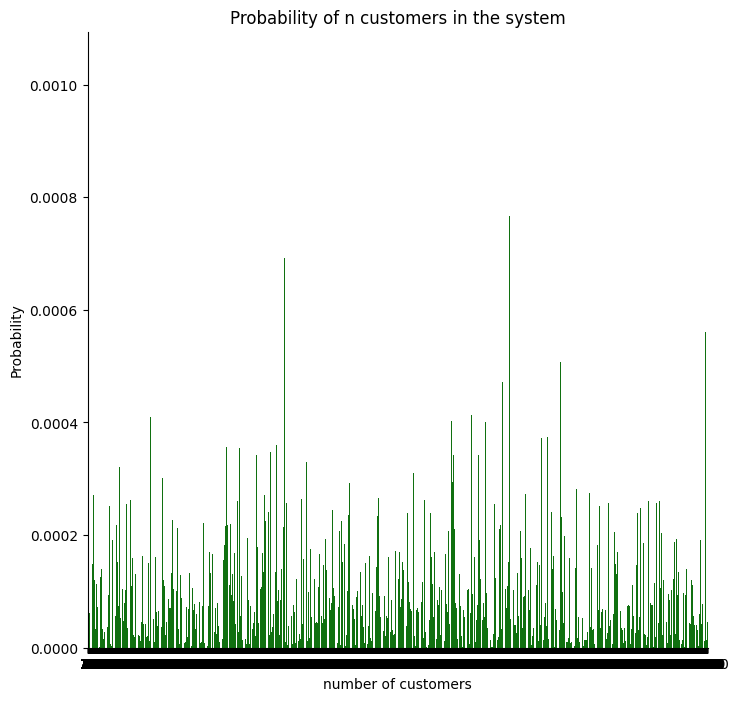

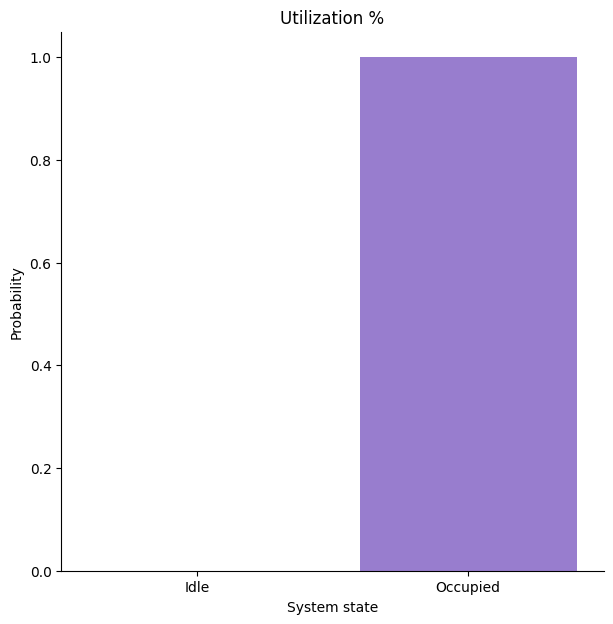

In [84]:
#plotting results
plt.figure(figsize=(8,8))
sns.barplot(x=Pn.index,y=Pn,color='g')
plt.title('Probability of n customers in the system')
plt.xlabel('number of customers')
plt.ylabel('Probability')
sns.despine()
plt.show()

plt.figure(figsize=(7,7))
sns.barplot(x=['Idle','Occupied'],y=[Pn[0],1-Pn[0]],color='mediumpurple')
plt.title('Utilization %')
plt.xlabel('System state')
plt.ylabel('Probability')
sns.despine()
plt.show()

#sns.barplot(x=df.values, y=df.index, alpha=0.8)

In [85]:
   #computing expected number of customers in the system
Ls=(sum(Pn*Pn.index))
        
    #computing expected customers waiting in line
Lq=sum((Pn.index[c+1:]-1)*(Pn[c+1:]))
    

In [86]:
# Model Results
print('Output:','\n',
     'Servers : '+str(c),'\n '
     'Time Between Arrivals : ',str(data.inter_arrival_times.mean()),'\n',
     'Service Time: (1/µ)',str(data.service_times.mean()),'\n'
     ' Utilization (c): ',str((Ls-Lq)/c),'\n',
     'Expected wait time in line (Wq):',str(data['wait_times'].mean()),'\n',
     'Expected time spent on the system (Ws):',str(data.total_times.mean()),'\n',
     'Expected number of customers in line (Lq):',str(Lq),'\n',
     'Expected number of clients in the system (Ls):',str(Ls),'\n '
     'Expected number of occupied servers :',str(Ls-Lq),'\n')

Output: 
 Servers : 1 
 Time Between Arrivals :  0.0009919210476983654 
 Service Time: (1/µ) 18795998.44523382 
 Utilization (c):  0.999999999996362 
 Expected wait time in line (Wq): 93956305120.6284 
 Expected time spent on the system (Ws): 93975101119.07362 
 Expected number of customers in line (Lq): 4999.63347694411 
 Expected number of clients in the system (Ls): 5000.633476944106 
 Expected number of occupied servers : 0.999999999996362 

